---
title: REACH / IMPACT Initiatives Assessment
date: 'Jan 18, 2024'
categories: [code, analysis, interview]
---

# REACH / IMPACT Initiatives Assessment

This was an assessment I did for REACH / IMPACT initiatives in December 2023. I was given a 2.5 hour time limit. The data for the exercise can be found [here](https://github.com/dcjohnson24/REACH_IMPACT_exercise).

## Instructions

This test includes three parts, 1. General Knowledge, 2. Data Processing and 3. Data Project. Use the spreadsheets Annex 1 to help you answer the questions below.

The test has been designed to take 2:30 hours and examines several competencies regarding data analysis. Read all questions before you begin and note that the three parts can be completed in any order. When sending back your answers, please share all scripts, code, files etc. that you used to solve the exercises. Please also list all websites/external sources you used to answer the questions. Using generative AI to answer the questions is not permitted. Checks on the use of AI will be performed.

All answers can be noted directly on this answer sheet unless otherwise specified. Please return this document with you answers, together with Annex 1 by email.

## Part 1 General Knowledge

1. Explain p-values in layman terms. Feel free to use analogies or examples. Keep it simple, but make sure to stay technically accurate.
    1. Why are they important?
    
    P-values given a measure of how precise an estimate is. It tells us how likely we are to see a value at least as large under the assumption that the null hypothesis is true. In the social sciences, a p-value less than or equal to 0.05 is considered to be a statistically significant result.
    
    2. How can they be interpreted?
    
    They can be interpreted as the probability of seeing a value at least as large for the coefficient under study given that the null hypothesis is true i.e. no effect. This gives some indication that the results are just noise.
    
    3. What are some common pitfalls/misunderstandings in their use and interpretation?
    
    Common misunderstandings of p-values are that they are the probability that the null-hypothesis is true or that the alternative hypothesis is true. A common misuse of p-values comes up when dealing with researcher degrees of freedom. Performing multiple comparisons of the data can increase the probability of encountering a false positive. There are also issues such as deciding to average certain groups, exclude other observations, and choosing regression predictors that affect the validity of a p-value (See [Gelman](https://stat.columbia.edu/~gelman/research/published/asa_pvalues.pdf)).

2. When would a Mosaic plot be an appropriate visualization?

A Mosaic plot is good for showing percentages of data in groups. It is a graphical representation of a contingency table. This would be useful for showing the effect of an intervention for treatment and control groups, for example. See [here](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/mosaic-plot.html#:~:text=Mosaic%20plots%20are%20used%20to,a%20visual%20comparison%20of%20groups) for more. 

3. What is personally identifiable information (PII)? Provide an example. When is it ok to collect PII?

Personally identifiable information is sensitive information that can be used to track down or know the identify of a person. This could be someone’s name, phone number, email, or ID number. This is generally something that should be kept safe. Information should not leave the office nor should it be discussed with unauthorized parties. It could be appropriate when signing up for services where PII is mandated or for following up with a customer.

## Part 2 Data Processing

In the spreadsheet Annex 1, you will find a raw dataset from a recent data collection exercise that was carried out by your team.

1. There are errors in in the dataset. Please identify at least four errors by highlighting them in yellow in the excel sheets. In the cleaning log tab, report the cell IDs, variable name and a small explanation on why you think this value can be an error in the comment column.

See the spreadsheet available [here](https://github.com/dcjohnson24/REACH_IMPACT_exercise/blob/main/REACH_HR_TEST_DATA_analyst.docx-EmbeddedFile_answers.xlsx).

2. Using the programming language python, create a new variable characterizing the household drinking water source into improved / unimproved source following the classification below. Paste the code / function you used below.

Table 1: Unimproved / Improved drinking water source categorization

| drinking_water_source             | Improved water source |
|-----------------------------------|-----------------------|
| Protected dug well                | Improved water source |
| Piped water to yard or plot       | Improved water source |
| Piped water into dwelling (house) | Improved water source |
| Bottled water                     | Improved water source |
| Tube well or borehole             | Improved water source |
| Public tap or standpipe           | Improved water source |
| Protected spring                  | Improved water source |
| Other                             | NA                    |

Start by importing the relevant libraries.

In [9]:
# Uncomment these lines and run them if you do not have the required packages installed. If you don't want 
# use a virtual environment, leave the first command commented and uncomment the last two.

#!python -m venv .venv
#!pip install --upgrade pip
#!pip install -r requirements.txt

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

from pathlib import Path

Read the data

In [11]:
DATA_PATH = Path('data')

df = pd.read_csv(DATA_PATH / 'REACH_HR_TEST_DATA_analyst.docx-EmbeddedFile.xlsm - Annex  1 - REACH Assessment Tes.csv')

In [12]:
df.head()

,InterviewID,data_collection_round,Marital status - Head of Household,single_headed_household,Number household member boy under5 years old,Number household member _girl_under5 years old,Number household member boy_5_17 years old,household_girl_5_17,number adult household members years old,Total household number,...,Households use bottled water as drinking water source,Household treating water,Improvedsanitationfacility,Mentionedafterdefecating,Mentionedbeforeeating,Mentionedbeforeeatingafterdefecating,Mentionedbeforefeedingchild,handwashingfull,Household praticing open defecation,Frequency respondant report handwhashing a day
0,baseline1,Baseline,Widowed,Yes,1,1,2,2,4,10,...,Other source,No,Improved toilet facility,Yes,Yes,Yes,No,Handwashing facility with Water & Soap,No open defecation,3 - 4 times
1,baseline10,Baseline,Married,No,0,0,1,0,1,2,...,Other source,Yes,Improved toilet facility,Yes,Yes,Yes,No,Handwashing facility with Water & Soap,No open defecation,7 times and more
2,baseline100,Baseline,Married,No,0,1,1,1,3,6,...,Other source,Yes,Improved toilet facility,No,Yes,No,No,Handwashing facility with Water & Soap,No open defecation,5 - 6 times
3,baseline1000,Baseline,Married,No,0,0,0,0,2,2,...,Other source,Yes,Improved toilet facility,Yes,Yes,Yes,No,Handwashing facility with Water & Soap,No open defecation,3 - 4 times
4,baseline1001,Baseline,Married,No,0,0,3,1,5,9,...,Bottled water,No,Improved toilet facility,Yes,Yes,Yes,No,Handwashing facility with Water & Soap,No open defecation,5 - 6 times


Check for strange values

In [13]:
for col in df.columns:
    print(df[col].value_counts())

InterviewID
uuid:21e50d02-d5a9-48ed-89dc-5312858a1239    2
baseline1                                    1
uuid:185510ee-8add-4bef-a40f-0149083941ba    1
uuid:1993bcf6-c7bf-4d14-80ae-19c63c090dc5    1
uuid:19863d7f-9da4-4ea7-ab40-5dfb98d262a2    1
                                            ..
baseline2443                                 1
baseline2442                                 1
baseline2441                                 1
baseline2440                                 1
uuid:ffd4a47d-c096-494d-b166-db98d4e87446    1
Name: count, Length: 4818, dtype: int64
data_collection_round
Baseline    3025
End-line    1794
Name: count, dtype: int64
Marital status - Head of Household
Married                                    4395
Widowed                                     296
Divorced                                     60
Single                                       56
Seperated_above_18_acting_as_caregiver_      12
Name: count, dtype: int64
single_headed_household
No     4391
Yes     428


Create a new variable using the mapping from Table 1.

In [14]:
improved_list = ['Protected dug well', 'Piped water to yard or plot', 'Piped water into dwelling (house)',
                 'Bottled Water', 'Tube well or borehold', 'Public tap or standpipe', 'Protected spring']


In [15]:
df['improved_water_source'] = ''
df.loc[df['drinking_water_source'].isin(improved_list), 'improved_water_source'] = 'Improved water source'
df.loc[~df['drinking_water_source'].isin(improved_list), 'improved_water_source'] = 'Unimproved water source'
df.loc[df['drinking_water_source'] == 'Other', 'improved_water_source'] = np.nan


3. This exercise requires the results of the previous exercise. Use any tools, statistics and visualizations that you see fit to analyze the questions below regarding how access to improved water sources changed between the baseline (first data collection round) and the endline (second data collection round, after a water improvement project has been implemented). Records for both rounds are in the same dataset; and come from randomly sampled households in the area of intervention. The column “data_collection_round” is “Baseline” for records of the first round, and “Endline” for records from the second round. Please share all code/files used for the analysis.
    a. Did single headed households receive more/less improvements? (relevant data column: “single_headed_household”)

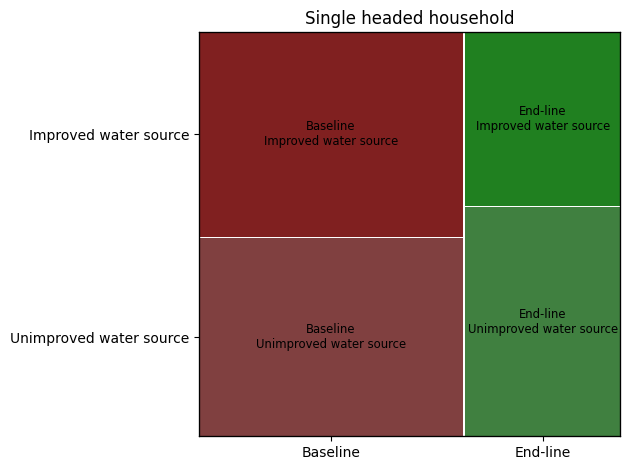

In [16]:
df_single = df.loc[df['single_headed_household'] == 'Yes']
df_single.groupby('data_collection_round')['improved_water_source'].value_counts(dropna=False)
df_single.groupby('data_collection_round')['improved_water_source'].value_counts(dropna=False, normalize=True)
mosaic(df_single, ['data_collection_round', 'improved_water_source'], title='Single headed household')
plt.tight_layout()
plt.show()

Single headed households received fewer improvements in endline than in baseline. There were 137 improved water sources in baseline (50.7% of all water sources) but only 68 improved water sources in endline (43% of all water sources)

b. Did the improvements affect cases of diarrhea in children under 5? (relevant data column: “diarrhea_under_5”)

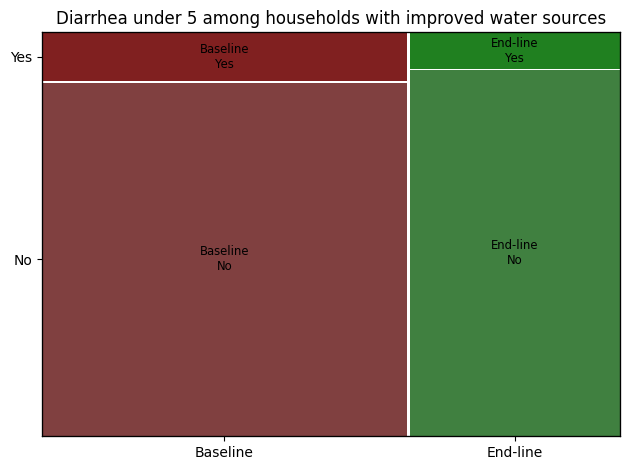

In [17]:
df_improved = df.loc[df['improved_water_source'] == 'Improved water source']
df_improved.groupby('data_collection_round')['diarrhea_under_5'].value_counts(dropna=False)
df_improved.groupby('data_collection_round')['diarrhea_under_5'].value_counts(dropna=False, normalize=True)
mosaic(df_improved, ['data_collection_round', 'diarrhea_under_5'], title='Diarrhea under 5 among households with improved water sources')
plt.tight_layout()
plt.show()

Yes, diarrhea in children under 5 went down from 72 cases in baseline (4.9%) to 31 cases in endline (3.8%).

## Part 3: Data Project

*Instructions*
 
Describe in detail the various stages involved in successfully completing a complex data project.
You are supporting a large household survey data collection in KoboToolbox. As part of this project, you want to develop an algorithm that would identify suspicious behavior of enumerator during data collection. 

You have it at your disposal. 
- the raw data from ODK / KoboToolbox, 
- the clean data
- the cleaning log in which cleaning operations are logged (see example in excel Annex 1), 
- the audit files from ODK / KoboToolbox that logs enumerator behavior during interview administering the interview. Form Audit Log - ODK Docs [getodk.org](https://getodk.org)

We want to identify if there are suspicious surveys (fake interviews for example) in the data collection that is coming:
- What are the different stages involved in carrying out such a project?

1. Download `audit.csv` from ODK
2. We could first look at the distribution of the length of interviews. Interviews that are suspiciously short or in the bottom 5% of times taken would be marked for further investigation. 
3. We would also look at the location data to compare it with where the respondent is supposed to be. Assuming that the interview was conducted at the respondent’s home, data that was filled in outside of this would be suspicious. 
4. We would also look at the distribution of the number of changes to response. Enumerators with an unusually high number could be investigated further, perhaps by performing a text analysis of their reasons for changes.
5. Another way of checking for fake surveys is by conducting back checks. A random 10% of households could be selected to be re-interviewed by a different enumerator. If the survey responses differ markedly from the original survey, this could be evidence of a fraudulent survey.

For each stage, detail the tasks to be carried out, the methods to be followed, possible avenues and critical points.
- Thoroughly justify your choices.

1. After downloading `audit.csv`, a duration variable could be created that is difference between the end and start times of the survey. The elapsed time is accurate even in the start and end timestamps aren’t as mentioned in Form Audit Log - ODK Docs [getodk.org](https://getodk.org). A histogram of the duration could be be plotted. Surveys with times in the bottom 10%, for example, could be checked to see whether the answers are sensible, how many skipped questions there are, etc. This could indicate whether an enumerator is simply rushing through a survey without regard to skip patterns or filling in responses at random.
2. For the location data, the GPS coordinates of where the survey was meant to be conducted can be checked against the location where it was actually done. The downside of this is that if the device shuts off or location data is not turned on, this would make it hard to know whether the survey was done at the appropriate location
3. For the number of changed responses, we could compute the number of changed responses per survey and plot a histogram of the result. Those in the highest 10%, for example, could be set aside for further investigation. We could look at the reasons for the changes and compare those with surveys that are closer to the median. 
4. Finally, for the back check portion, we can randomly sample a subset of interview IDs to be re-interviewed. A trusted enumerator, preferably separate from the rest of the team, will then be sent to re-interview those households using the entire questionnaire or only the questions of concern. The answers will be compared to those from the first survey. One way to compare is to use the [bcstats](https://github.com/PovertyAction/ipabcstats) tool developed by Innovations for Poverty Action. Check [here](https://dimewiki.worldbank.org/Back_Checks) for more information about back check procedures. 
